In [ ]:
# ATMS 305, Fall 2024: Quiz #5

In [5]:
# >> Import as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Trees image is 1280 wide by 1024 high


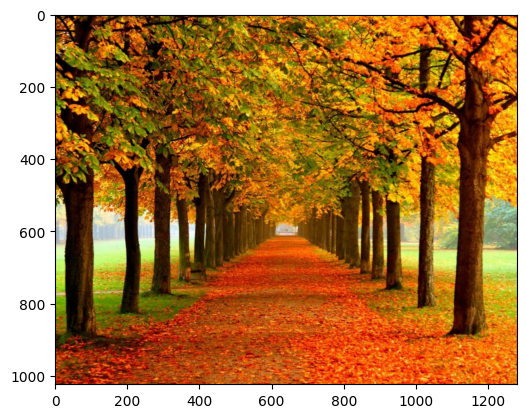

In [6]:
# >> A. IMAGE READ + DIMENSIONS + DISPLAY
#  1. Get image:  rfd.atmos.uiuc.edu/305/TreeImage.png
#  2. Read image
#  3. Display the image
#  4. Set:  height = number of rows in image, from shape
#  5. Set:  width  = number of columns in image, from shape
#  6. Print size info in one print() statement so looks like:
#        Trees image is ### wide by #### high     (use variables to fill in!!)
#  Dimensions should be 1280 wide and 1024 high.

!wget -q -N  rfd.atmos.uiuc.edu/305/TreeImage.png

img = mpimg.imread('TreeImage.png')

plt.imshow(img)

height = img.shape[0]
width = img.shape[1]

# 6. Print size info in one print() statement
print(f"Trees image is {width} wide by {height} high")

In [11]:
# >> B. FORECAST TIME SERIES
#  :: Data given/from forecast for Nashville, TN.
TMP = np.array([51 ,49 ,48 ,60 ,66 ,69 ,65 ,59 ,56 ,54 ,54 ,63 ,67 ,68 ,62 ,53 ,47 ,43 ,42 ,67 ,65 ])
DPT = np.array([48 ,46 ,45 ,48 ,46 ,44 ,44 ,43 ,45 ,46 ,47 ,48 ,43 ,38 ,36 ,34 ,35 ,34 ,35 ,38 ,42 ])
WDR = np.array([ 1 ,35 ,34 , 1 ,31 ,30 ,27 ,20 ,20 ,21 ,25 ,32 ,32 ,32 ,34 ,35 ,35 , 6 ,30 ,18 ,16 ])
WSP = np.array([ 6 , 4 , 4 , 4 , 6 , 7 , 5 , 3 , 6 ,10 , 8 ,10 ,14 ,13 , 9 , 4 , 2 , 1 , 1 , 5 , 6 ])

In [13]:
# >> C. PRINT DATA + FIND FRONTAL PASSAGE
#
#  1. Some statistics!
#    a) Use np.min and np.max to find the highest and lowest
#       temperatures from array TMP.
#    b) ALSO, convert them to deg. Celsius, so you can print both
#       the min and max in degrees F AND degrees C.
#       > Reminder:  Deg. C = (deg. F - 32)*5/9   (print C temps with %2.0f)
#    c) Output MUST look like:
#        Lowest temp = ## F = ## C (use variables to fill in!)
#        Highest temp = ## F = ## C
#
#  2. LOOP over all times...........
#     > INSIDE the loop:
#     a) Print out the data at that time.
#        * The output MUST look like:
#              At 27 hours, T=54, Td=46, Wind from 21 at 10
#        * you are printing the: Time, TMP, DPT, WDR, WSP -- at a given time.
#        *  ... USE your (loop index * 3) to be the time in hours.
#        *  ... be sure the columns line up - check your formatting!
#
#     b) In the same time loop, check if the following TWO conditions are true:
#        i) if your for-loop index is > 1 (i.e. we're in the 3rd or later time),
#           ..AND..
#       ii) if the difference between DPT at the current time and
#            DPT **two loop steps before** is LESS than -8, THEN
#            print the message: Frontal passage
#      iii) This should happen only once, at 39 hours.
#

minTemp = np.min(TMP)
maxTemp = np.max(TMP)
minTempc = (minTemp - 32) * 5/9
maxTempc = (maxTemp - 32) * 5/9
print(f'Lowest temp = {minTemp} F = {minTempc:.0f} C')
print(f'Highest temp = {maxTemp} F = {maxTempc:.0f} C')

fronted = False

for i in range(len(TMP)):
    
    print(f"At {i*3:2d} hours, T={TMP[i]:2d}, Td={DPT[i]:2d}, Wind from {WDR[i]:2d} at {WSP[i]:2d}")
    
    if i > 1:        
        if DPT[i] - DPT[i - 2] < -8 and not fronted:
            print("Frontal passage")
            fronted = True


Lowest temp = 42 F = 6 C
Highest temp = 69 F = 21 C
At  0 hours, T=51, Td=48, Wind from  1 at  6
At  3 hours, T=49, Td=46, Wind from 35 at  4
At  6 hours, T=48, Td=45, Wind from 34 at  4
At  9 hours, T=60, Td=48, Wind from  1 at  4
At 12 hours, T=66, Td=46, Wind from 31 at  6
At 15 hours, T=69, Td=44, Wind from 30 at  7
At 18 hours, T=65, Td=44, Wind from 27 at  5
At 21 hours, T=59, Td=43, Wind from 20 at  3
At 24 hours, T=56, Td=45, Wind from 20 at  6
At 27 hours, T=54, Td=46, Wind from 21 at 10
At 30 hours, T=54, Td=47, Wind from 25 at  8
At 33 hours, T=63, Td=48, Wind from 32 at 10
At 36 hours, T=67, Td=43, Wind from 32 at 14
At 39 hours, T=68, Td=38, Wind from 32 at 13
Frontal passage
At 42 hours, T=62, Td=36, Wind from 34 at  9
At 45 hours, T=53, Td=34, Wind from 35 at  4
At 48 hours, T=47, Td=35, Wind from 35 at  2
At 51 hours, T=43, Td=34, Wind from  6 at  1
At 54 hours, T=42, Td=35, Wind from 30 at  1
At 57 hours, T=67, Td=38, Wind from 18 at  5
At 60 hours, T=65, Td=42, Wind f

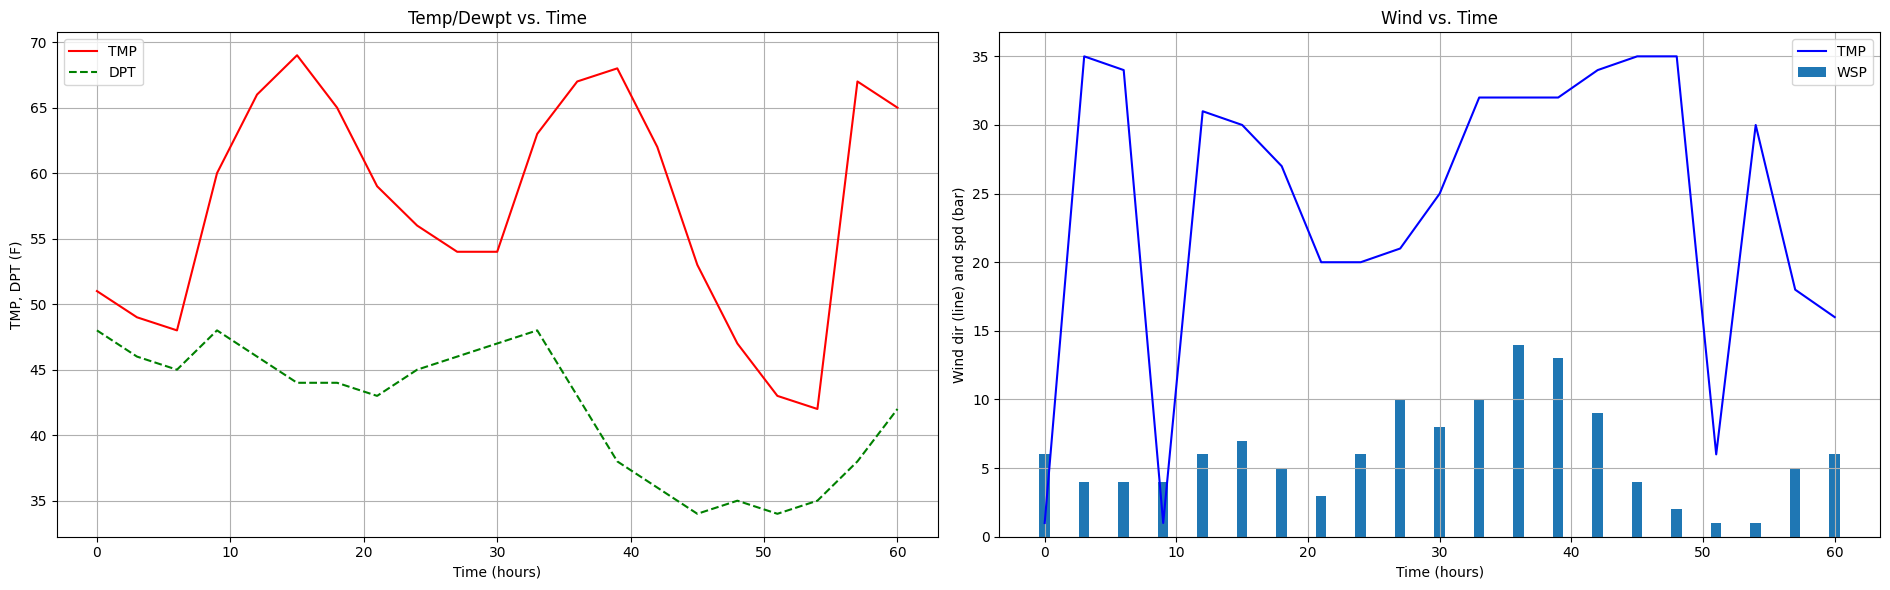

In [18]:
# >> D. PLOT DATA
#
#  1. Create a larger figure than the default (I used 10x6")
#  2. Create an 'hours' array with np.arange() that runs from 0
#       to 60 hours (inclusive!!) at a 3-hour interval.
#       The last value should be 60!
#
#  3. Create a 1-row 2-column plot.
#     a) All plots have 'hours' as X-axis values!!
#     b) Left side: plot TMP (red line)and DPT (green line) (dash if you like)
#          Add labels - X: Time (hours)   Y: TMP, DPT (F)
#          Add title: Temp/Dewpt vs. Time
#     c) Right column: plot WDR (wind direction, 10s of degrees) as
#             blue line and add a plt.bar bar-plot for WSP.
#          Add labels - X: Time (hours)   Y: Wind dir (line) and spd (bar)
#          Add title: Wind vs. Time
#     d) Use tight_layout if needed (I didn't need it)

fig = plt.figure(figsize=(19, 6))

hours = np.arange(0, 61, 3)

plt.subplot(1, 2, 1)
plt.plot(hours, TMP, 'r', label='TMP')
plt.plot(hours, DPT, 'g--', label='DPT')
plt.xlabel('Time (hours)')
plt.ylabel('TMP, DPT (F)')
plt.title('Temp/Dewpt vs. Time')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hours, WDR, 'b', label='TMP')
plt.bar(hours, WSP, label='WSP')
plt.xlabel('Time (hours)')
plt.ylabel('Wind dir (line) and spd (bar)')
plt.title('Wind vs. Time')
plt.grid()
plt.legend()

plt.tight_layout()

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME